In [1]:
%matplotlib inline
from preamble import *

/Users/hsuningchang/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Representing Data and Engineering Features

### Categorical Variables

#### One-Hot-Encoding (Dummy variables)

#### drop_first = True of False ?
It depends on the model. 
If you don't drop the first column then your dummy variables will be correlated (redundant). This may affect some models adversely and the effect is stronger when the cardinality is smaller. For example iterative models may have trouble converging and lists of variable importances may be distorted.

- If you have a small number of dummies : removing the first dummy
- If you have a category with hundreds of values :  not dropping the first column. That will make it easier for the model to "see" all the categories quickly during learning (and the adverse effects are negligible)

In [2]:
import os
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(
    adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# For illustration purposes, we only select some of the columns
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
# IPython.display allows nice output formatting within the Jupyter notebook
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [3]:
data.select_dtypes(include=np.number).columns

Index(['age', 'hours-per-week'], dtype='object')

In [4]:
data.select_dtypes(include='object').columns

Index(['workclass', 'education', 'gender', 'occupation', 'income'], dtype='object')

##### Checking string-encoded categorical data

In [5]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [6]:
print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [7]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,...,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,...,0,0,1,0
1,50,13,0,0,...,0,0,1,0
2,38,40,0,0,...,0,0,1,0
3,53,40,0,0,...,0,0,1,0
4,28,40,0,0,...,0,0,1,0


In [8]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Extract NumPy arrays
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

/Users/hsuningchang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test score: 0.81


#### Numbers Can Encode Categoricals

In [10]:
# create a DataFrame with an integer feature and a categorical string feature
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
                        'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [11]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
display(pd.get_dummies(demo_df, co  lumns=['Integer Feature', 'Categorical Feature']))

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


### OneHotEncoder and ColumnTransformer: Categorical Variables with scikit-learn

In [12]:
from sklearn.preprocessing import OneHotEncoder
# Setting sparse=False means OneHotEncode will return a numpy array, not a sparse matrix
ohe = OneHotEncoder(sparse=False)

In [13]:
pd.DataFrame(ohe.fit_transform(demo_df), columns=ohe.get_feature_names())

,x0_0,x0_1,x0_2,x1_box,x1_fox,x1_socks
0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0


In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

columntransformer = ColumnTransformer([
    ("scaling", StandardScaler(), ["age", 'hours-per-week']), 
    ("onehot", OneHotEncoder(sparse=False), ["workclass", "education", "gender", "occupation"])
])

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# get all columns apart from income for the features
data_features = data.drop("income", axis=1)
# split dataframe and income
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data.income, random_state=0)

columntransformer.fit(X_train)
X_train_trans = columntransformer.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [16]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

X_test_trans = columntransformer.transform(X_test)
print("Test score: {:.2f}".format(logreg.score(X_test_trans, y_test)))

/Users/hsuningchang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test score: 0.81


In [17]:
columntransformer.named_transformers_.onehot

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=False)

#### Convenient ColumnTransformer creation with ``make_columntransformer``

In [18]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (StandardScaler(), ['age', 'hours-per-week']),
    (OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation']))

### Binning, Discretization, Linear Models, and Trees

- Using binning (=discretization) of the feature to split the continuous data into multiple features can make linear models more powerful

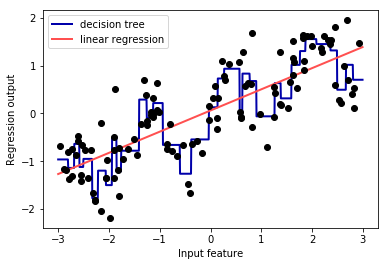

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [20]:
from sklearn.preprocessing import KBinsDiscretizer

In [21]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([-2.967, -2.378, -1.789, -1.2  , -0.612, -0.023,  0.566,  1.155,
        1.744,  2.333,  2.921])]


In [22]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [23]:
print(X[:10])
X_binned.toarray()[:10]

[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]
 [-2.064]
 [-2.651]
 [ 2.197]
 [ 0.607]
 [ 1.248]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [24]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

In [25]:
X_binned

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

- the linear regression model and the decision tree make exactly the same predictions
- each bin predict a constant value. As features are constant within each bin, any model must predict the same value for all points within a bin
- after binning : linear model became much more flexible
- while the decision tree model got much less flexible = binning feature generally has no beneficial effect for tree-based models
    - Trees can learn to split up the data anywhere
    - Trees can learn to whatever binning is most useful for prediction on the data
    - Trees look at multiple features at one
- For linear model, with very large and high-dimensional data, but some features have nonlinear relations with the ouput --- biining can be a great way to increase modeling power

Text(0.5,0,'Input feature')

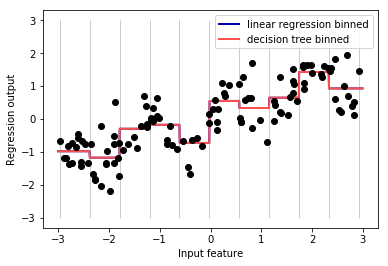

In [26]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

### Interactions and Polynomials
- Adding interaction features and polynomial features of the original data
- enrich a feature representation (particularly for linear models)
- often in statistical modeling

#### add a slope to linear by adding the original feature ?
- One way to add a slope to the linear model on the binned data is to add the original feature (the x-axis in the plot) back in
- in this example, the model learned an offset for each bin, together with a slope
#### better add an interaction / product feature
- Beacause the slope is shared across all bins, it doesn't seem to be very helpful. 
- We would rather have a separate slope for each bin ! 
- Adding an interaction or product feature that indicates which bin a data point isin and where it lies on the x-axis is better

Shape : (120, 11)


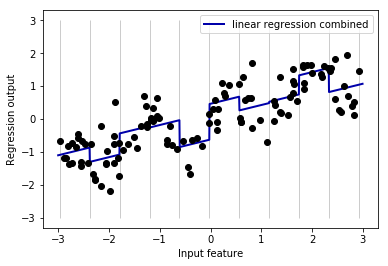

In [27]:
X_combined = np.hstack([X, X_binned])
print("Shape :", X_combined.shape)

reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

This feature is a product of the bin indicator and the original feature

In [28]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(120, 20)


Now each bin has its own offset and slope : 

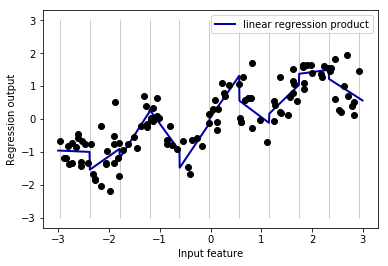

In [29]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

#### Polynomial 
- another way to expand a continuous feature
- for a given feature x, we might want to consider x**2, x**3, and so on.
- Using polynomial features together with a linear regression model yields the classical model of polynomial regression


#### Polynomial regression
- 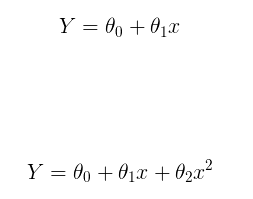
- Why : the straight line is unable to capture the patterns in the data - under fitting the data. To overcome under-fitting, we need to increase the complexity of the model.
- This is still considered to be linear model as the coefficients/weights associated with the features are still linear. x² is only a feature. However the curve that we are fitting is quadratic in nature.
- we know that our data is correlated but the relationship doesn’t look linear : do a polynomial regression on the data to fit a polynomial equation to it.
- Advantages of using Polynomial Regression:
    - Polynomial provides the best approximation of the relationship between the dependent and independent variable.
    - A Broad range of function can be fit under it.
    - Polynomial basically fits a wide range of curvature.
- Disadvantages of using Polynomial Regression
    - The presence of one or two outliers in the data can seriously affect the results of the nonlinear analysis.
    - These are too sensitive to the outliers.
    - In addition, there are unfortunately fewer model validation tools for the detection of outliers in nonlinear regression than there are for linear regression.

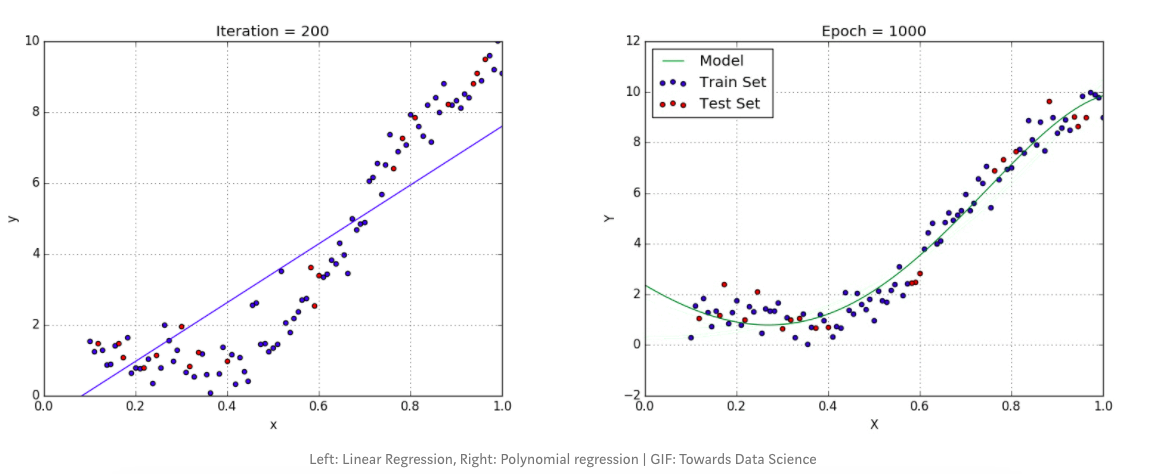

In [30]:
from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=15, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [31]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (120, 15)


In [32]:
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]
Entries of X_poly:
[[     -0.753       0.567      -0.427       0.321      -0.242       0.182
       -0.137       0.103      -0.078       0.058      -0.044       0.033
       -0.025       0.019      -0.014]
 [      2.704       7.313      19.777      53.482     144.632     391.125
     1057.714    2860.36     7735.232   20918.278   56569.004  152978.757
   413698.285 1118758.414 3025442.535]
 [      1.392       1.938       2.697       3.754       5.226       7.274
       10.125      14.094      19.618      27.307      38.011      52.91
       73.648     102.516     142.698]
 [      0.592       0.35        0.207       0.123       0.073       0.043
        0.025       0.015       0.009       0.005       0.003       0.002
        0.001       0.001       0.   ]
 [     -2.064       4.26       -8.791      18.144     -37.448      77.289
     -159.516     329.222    -679.478    1402.367   -2894.328    5973.569
   -12328.779   25445

get_feature_names method provides the exponent for each feature

In [33]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10', 'x0^11', 'x0^12', 'x0^13', 'x0^14', 'x0^15']


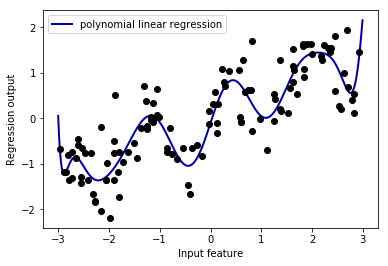

In [34]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

#### Using a more complex model, a kernel SVM, we are able to learn a similarly complex prediction to the polynomial regression without an explicit transformation of the features

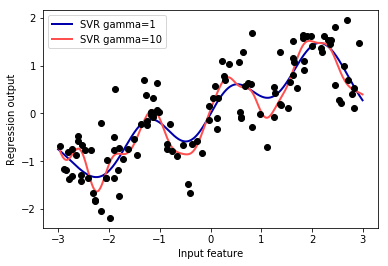

In [35]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [36]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=0)

# rescale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


>- the first new feature is a constant feature, called "1" here
- the next 13 features are the original features.
- then the first feature sqared ("x0^2") and combinations of the first and the other features

In [38]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [39]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
    ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(
    ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


In [40]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
    rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.782
Score with interactions: 0.763


### Univariate Nonlinear Transformations
- Applying mathematical functions like **log, exp, or sin** often prove useful for transforming certain features
- Tree-based only care about the ordering of the features
- But **linear models** and **neural networks** are very tied to the scale and distribution of each feature, if nonlinear relation, it would be hard to model (particularly in regression)
    - The function *log* and *exp* adjust the relative sacles in the data : captured better by the models
- Most models work best when each feature (and in regression also the target) is loosely Gaussian distributed (bell curve shape, normal distribution)

In [41]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [42]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


In [43]:
from scipy.stats import kurtosis, skew

### Skewness
- a measure of the lack of symmetry in data distribution
- the degree of distortion from the symmetrical bell curve or the normal distribution
- a data set is symmetric if it looks the same to the left and right of the center point - skewness=0
- Postivie skew : the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode
- Negative Skew : the tail of the left side of the distribution is longer or fatter than the tail on the right side. The mean and median will be less than the mode

fisherbool, optional
If True, Fisher’s definition is used (normal ==> 0.0). If False, Pearson’s definition is used (normal ==> 3.0).

#### The rule of thumb seems to be:
- between -0.5 and 0.5 : data are fairly symmetrical
- between -1 & -0.5 or between 0.5 & 1 :  data are moderately skewed
- less than -1 or greater than 1 : data are highly skewed


### Kurtosis
- a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution
- describe the extreme values in one versus the other tail
- the measure of outliers present in the distribution
- High kurtosis : 
	- tend to have havy tails, or outliers
	- need to investigate why do we have so many outliers

- Low kurtosis : 
	- tend to have light tails, or lack of outliers
	- too good to be true
	- need to investigate and trim the dataset of unwanted results.

#### The rule of thumb seems to be:
- Mesokurtic (Kurtosis = 3): statistic similar to that of the normal distribution. It means that the extreme values of the distribution are similar to that of a normal distribution characteristic.
- Leptokurtic (Kurtosis > 3): Distribution is longer, tails are fatter. Peak is higher and sharper than Mesokurtic, which means that data are heavy-tailed or profusion of outliers. Outliers stretch the horizontal axis of the histogram graph, which makes the bulk of the data appear in a narrow (“skinny”) vertical range, thereby giving the “skinniness” of a leptokurtic distribution.
- Platykurtic: (Kurtosis < 3): Distribution is shorter, tails are thinner than the normal distribution. The peak is lower and broader than Mesokurtic, which means that data are light-tailed or lack of outliers. The reason for this is because the extreme values are less than that of the normal distribution.

In [44]:
print("Kurtosis : ", kurtosis(X[:, 0]))
print("Skew : ", skew(X[:, 0]))

Kurtosis :  10.493670402282998
Skew :  2.7751587297647577


Text(0.5,0,'Value')

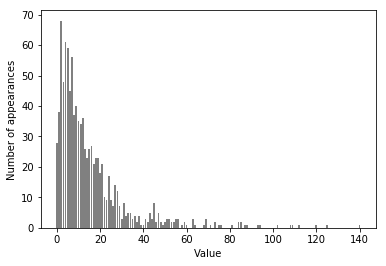

In [45]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [46]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


- Model was not able to capture the relationship between X and y
- Applying a logarithmic transformaton
- The value 0 appears in the data (logarithm is not defined at 0) -> apply log(X+1)

In [47]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

In [48]:
print("Kurtosis : ", kurtosis(X_train_log[:, 0]))
print("Skew : ", skew(X_train_log[:, 0]))

Kurtosis :  -0.19056281607589032
Skew :  -0.16426838920976747


Text(0.5,0,'Value')

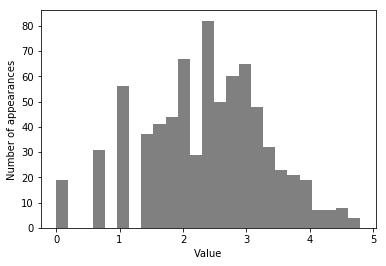

In [49]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [50]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


### Conclusion
- All kins of transformations (binning, polynomials, and interactions, mathmatical functions) can have a huge influence on how models perform
- these kinds of transformations are **irrelevant for complex models like tree-based models**, as they are often able to discover important interactions themselves, and dont't require transforming the data explicitly most of the time.
- But might be **essential for linear models**, and sometimes it is also a good idea to transform the target variable y in regression. Try to predict counts is a fairly common task, and using the log(y+1) transformation often helps
- Othermodels, like **SVMs, nearest neighbors, and neural networks**, might sometimes benefit from using binning, interactions, or polynomials, but the **implications there are usually much less clear than** in the case of linear models.

### Automatic Feature Selection
- adding more features makes all models more complex, so increases the chance of overfitting
- reduce the number of features to only the most useful ones and discard the rest
- 3 basic strategies : **univariate statistics, model-based selection, and iterative selection**
- These are **supervised** methods, need the target for fitting the model
- Split the data into training and test sets, and fit the feature selection only on the training part of the data

#### Univariate statistics
- statistically significant relationship between each feature and the target
- the features that are related with the highest confidence are selected
- case of classification : analysis of variance (ANOVA)
- univariate : only consider each feature individually. So a feature will be discarded if it is only informative when combined with another feature.
- fast to compute, don't require building a model -> completely independent of the model that you might want to apply after the feature selection

##### Univariate feature selection in sklearn
- choose a test : *f_classif* (the default) for classification or *f_regression* for regression
- a method to discard features based on the p-values determined in the test
- Methods for discarding parameters use a threshold to discard all features with too high a p-value.
    - *SelectKbest* : selects a fixed number k of features
    - *SlectiPercentil* : selects a fixed percentage of features
    - *GenericUnivariateSelect* : selects with a configurable strategy. This allows to select the best univariate selection strategy with hyper-parameter search estimator

In [51]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, SelectKBest, GenericUnivariateSelect
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


In [52]:
from sklearn.linear_model import LogisticRegression

# use f_classif (the default) and SelectPercentile to select 50% of features
select1 = SelectPercentile(percentile=50).fit(X_train, y_train)
select2 = SelectKBest(k=40).fit(X_train, y_train)
select3 = GenericUnivariateSelect(mode='k_best', param=40).fit(X_train, y_train)

for select in [select1, select2, select3]:
    # transform training set
    X_train_selected = select.transform(X_train)

    # transform test data
    X_test_selected = select.transform(X_test)

    lr = LogisticRegression(max_iter=10000, solver='lbfgs')
    lr.fit(X_train, y_train)
    print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
    lr.fit(X_train_selected, y_train)
    print("Score with only selected features: {:.3f}".format(
        lr.score(X_test_selected, y_test)))

Score with all features: 0.951
Score with only selected features: 0.933
Score with all features: 0.951
Score with only selected features: 0.933
Score with all features: 0.951
Score with only selected features: 0.933


#### Removing features with low variance
- VarianceThreshold : simple baseline approach
- removes all features whose variance doesn't meet some threshold.
- By default, it removes all zero-variance features (features that have the same value in all samples)
- As an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples. Boolean features are Bernoulli random variables, and the variance of such variables is given by $Var[X]=p(1-p)$ = .8*(1-.8)

In [53]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

#### Model-based Feature Selection

- use a supervised ML model to judge the importance of each feature
- the model needs to provide some measure of importance for each feature.
- decision trees and decision tree-based models provide a feature_importances_ attribute
- linear models have coefficient, with L1 penalty learn sparse coefficients, which only use a small subset of features
- consider all features at once, so can capture interactions


**SelectFromModel**
- the class selects all features that have an importance measure of the feature greater than the provided threshold.

In [55]:
from sklearn.feature_selection import   
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

In [56]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


([], <a list of 0 Text yticklabel objects>)

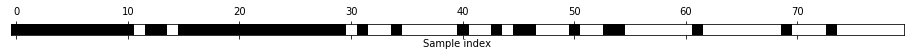

In [57]:
mask = select.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [58]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=1000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


/Users/hsuningchang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Iterative feature selection
- a series of models are built, with varying numbers of features
- two basic methods : starting with no features and adding features one by one until some stopping criterion is reached, or starting with all features and removing features one by one until some stopping criterion is reached
- much more computationally expensive

#### Recursive feature elimination (RFE)
- starts with all features
- builds a model
- discards the least important feature according to the model
- builds a new model using all but the discarded feature
- until only a prespecified number of features are left
- same performance as that achieved by training a logistic regression model on top of the selected features
- got better compared to the univariate and model based selection, but takes significantly loger than that for the model -based selection.

([], <a list of 0 Text yticklabel objects>)

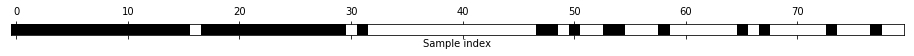

In [62]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [63]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(max_iter=1000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


/Users/hsuningchang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [64]:
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.951


### Utilizing Expert Knowledge

In [ ]:
citibike = mglearn.datasets.load_citibike()

In [ ]:
print("Citi Bike data:\n{}".format(citibike.head()))

In [ ]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                       freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

In [ ]:
# extract the target values (number of rentals)
y = citibike.values
# convert to POSIX time by dividing by 10**9
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

In [ ]:
# use the first 184 data points for training, the rest for testing
n_train = 184

# function to evaluate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
    # split the given features into a training and a test set
    X_train, X_test = features[:n_train], features[n_train:]
    # also split the target array
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,
               ha="left")

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
             label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

In [ ]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

In [ ]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

In [ ]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

In [ ]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

In [ ]:
eval_on_features(X_hour_week_onehot, y, Ridge())

In [ ]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [ ]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features =  day + hour

In [ ]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

In [ ]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude")

### Summary and Outlook
- It is important to represent data in a way that is suitable for the machine learning algorithm. Ex : by one-hot-encoding categorical variables
- The importance of engineering new features, and the possibility of utilizing expert knowledge in creating derived features from your data
- linear models might benefit greatly from generating new features via binning and adding polynomials and interactions
- more complex, non-linear models like random forests and SVMs might be able to learn more complex tasks without explicitly expanding the feature space
- **The features that are used and the match between features and method is often the most important piece in making a machine learning approach work well**